# **Mid Course Assessment - ML Case Study**

**Mid Course Assessment - ML Case Study**


**submit by - Ashwin Pawar**


### 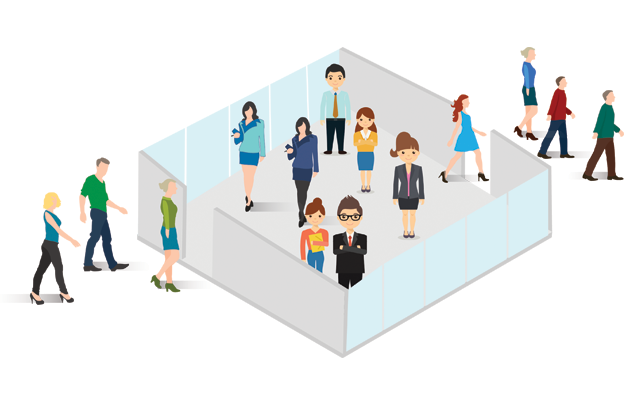

## Context:
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplist the following for this study:

- Identify and visualize which factors contribute to customer churn:

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## We will be using ANN models and H2O Auto ML in this project

## Time Line of the Project:
- Data Analysis
- Feature Engineering
- Model Building using ANN
- Model Building and Prediction using H2O Auto ML

**Github link -** https://github.com/pawarashwin/Data-Science_Projects/tree/main/ML%20Case%20Study

**Data csv file link** - https://drive.google.com/file/d/1b0gdjuejHgX45CwzQhpxyArLzeoqhgtd/view?usp=sharing


#IMPORTING LIBRARIES

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

#DATA DESCRIPTION

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


#Data Analysis

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

## We will plot a Pie Chart

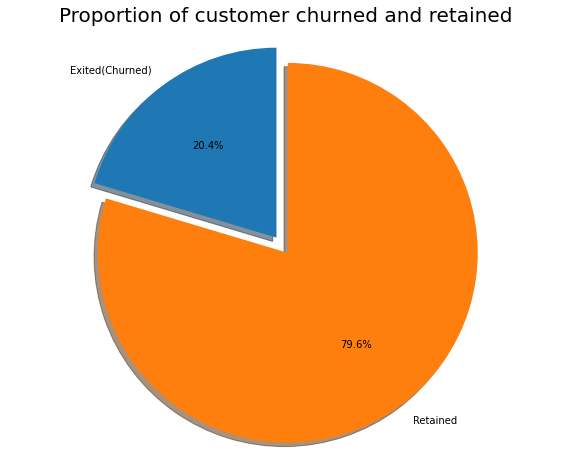

In [ ]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

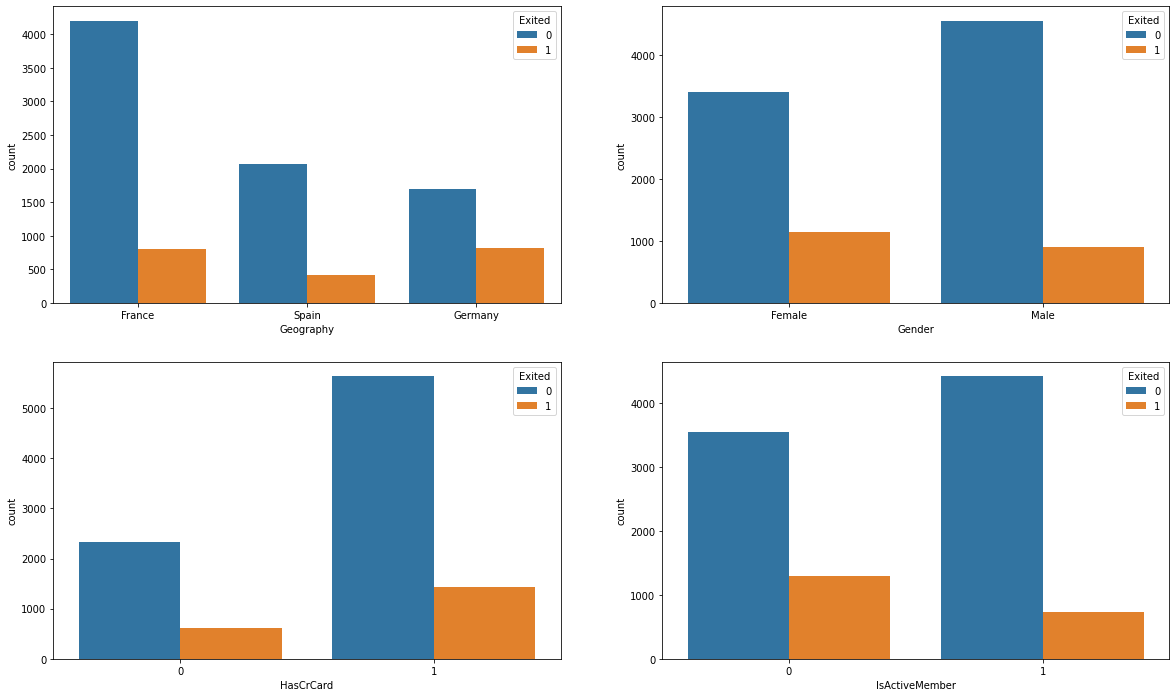

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

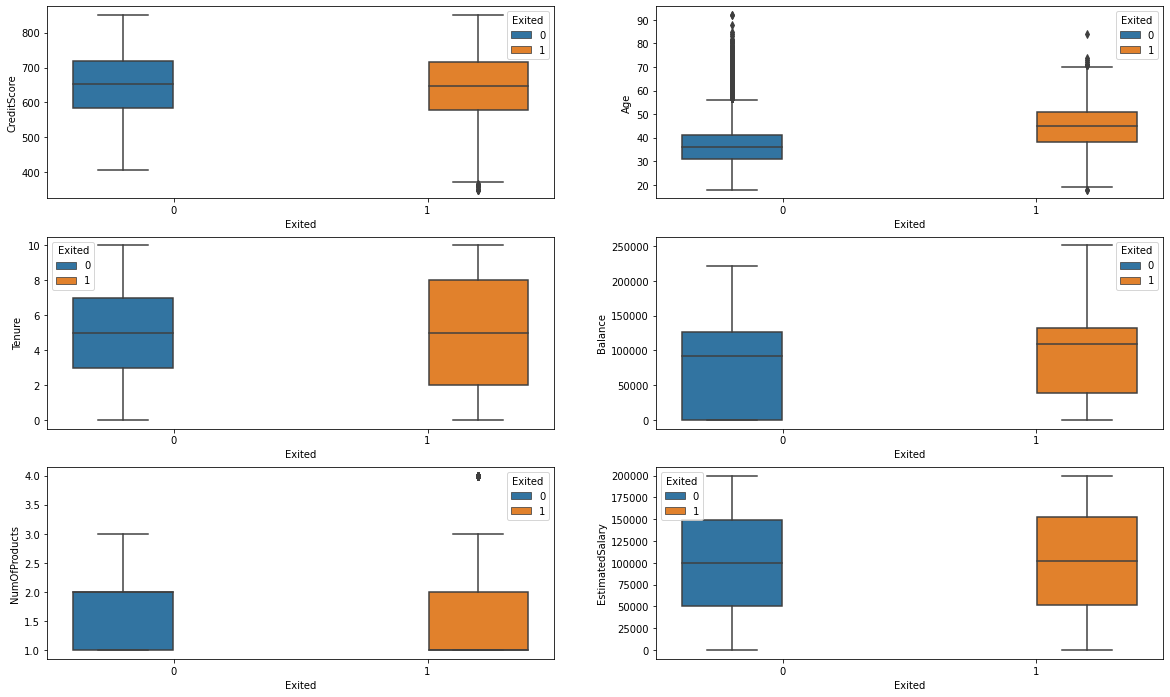

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

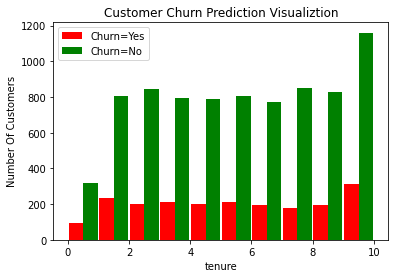

In [ ]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Feature Engineering

### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

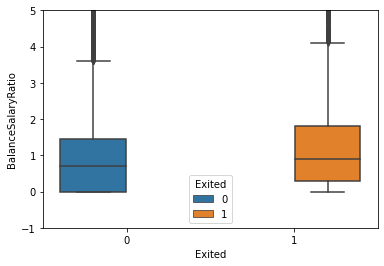

In [ ]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

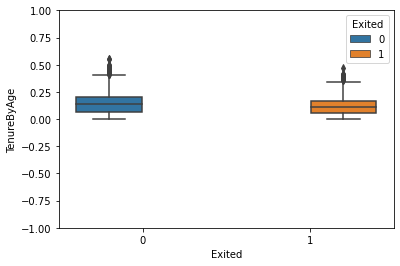

In [ ]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

### Printing the categorical variables

In [ ]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

In [ ]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding method

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


But as we can see our dataset is imbalanced.
As it contains only 2037 records of people who churned out against a total of 10,000 records

So, We will first try to apply our Machine Learning Models without Balancing the data.

# Partitioning DATA

In this Section we are going to divide our data into two parts i.e., Training & Testing Data
Training Data: -Training data is the data you use to train an algorithm or machine learning model to predict the outcome you design your model to predict.
Testing Data: - Testing data is the data you use to cross-validate your model's performance based on accuracy score, precision score, F1-Score etc. based on your model training.

In [ ]:
X=df1.drop('Exited',axis=1) #Taking independent features in variable 'X'

In [ ]:
Y=df1['Exited'] #Taking dependent features in variable 'Y'

Let's Check our X & Y Values

In [ ]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,1.587055,0.046512,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0.000000,0.128205,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0.564108,0.285714,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0.000000,0.194444,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.808230,0.071429,0,1,0


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X0_train,X0_test,Y0_train,Y0_test=train_test_split(X,Y,test_size=.20,random_state=40,stratify=df['Exited']) #Diving the data into 80:20 where 80% for training and 20% for testing.

Here we have used 'stratify' parameter so as to remove the possibility of a data portion not having records of a particular class

Let's check if our train and test data are stored correctly or not.

In [ ]:
X0_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
4761,799,0,32,3,106045.92,2,1,1,17938.00,5.911803,0.093750,1,0,0
5614,512,0,46,3,0.00,2,1,1,56408.14,0.000000,0.065217,0,0,1
8475,633,1,58,2,128137.42,2,1,0,147635.33,0.867932,0.034483,0,1,0
5352,695,0,23,1,0.00,2,1,1,141756.32,0.000000,0.043478,1,0,0
6366,683,1,73,9,124730.26,1,1,1,51999.50,2.398682,0.123288,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,659,1,29,6,123192.12,1,1,1,56971.41,2.162350,0.206897,1,0,0
3966,815,1,35,4,0.00,2,0,1,198490.33,0.000000,0.114286,1,0,0
9608,700,1,44,9,0.00,2,1,0,142287.65,0.000000,0.204545,0,0,1
7540,553,1,37,1,0.00,1,1,0,30461.55,0.000000,0.027027,1,0,0


In [ ]:
Y0_test

4897    0
2483    0
3502    1
2731    0
5307    1
       ..
6361    0
7195    0
7558    1
2883    0
2651    0
Name: Exited, Length: 2000, dtype: int64

So, our train and test data is now divided into exactly 80:20 ratio

#Using Imbalanced Data

##ML MODELS

In [ ]:
X1_train=X0_train    #taking our training and testing data into other variable so as it remains same after scaling
X1_test=X0_test
Y1_train=Y0_train
Y1_test=Y0_test

In [ ]:
X1_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
4761,799,0,32,3,106045.92,2,1,1,17938.00,5.911803,0.093750,1,0,0
5614,512,0,46,3,0.00,2,1,1,56408.14,0.000000,0.065217,0,0,1
8475,633,1,58,2,128137.42,2,1,0,147635.33,0.867932,0.034483,0,1,0
5352,695,0,23,1,0.00,2,1,1,141756.32,0.000000,0.043478,1,0,0
6366,683,1,73,9,124730.26,1,1,1,51999.50,2.398682,0.123288,0,1,0


In [ ]:
Y1_train.head()

4761    0
5614    0
8475    1
5352    0
6366    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler # we need to scale the data for our logistic regression Model

In [ ]:
scaler=StandardScaler()

In [ ]:
X1_train=scaler.fit_transform(X1_train)
X1_test=scaler.transform(X1_test)

In [ ]:
X1_train

array([[ 1.54209586, -1.09471739, -0.65606967, ...,  0.998002  ,
        -0.57658047, -0.57658047],
       [-1.43321703, -1.09471739,  0.67898008, ..., -1.002002  ,
        -0.57658047,  1.73436329],
       [-0.17881682,  0.91347777,  1.82330843, ..., -1.002002  ,
         1.73436329, -0.57658047],
       ...,
       [ 0.51576842,  0.91347777,  0.48825869, ..., -1.002002  ,
        -0.57658047,  1.73436329],
       [-1.00817233,  0.91347777, -0.17926619, ...,  0.998002  ,
        -0.57658047, -0.57658047],
       [-0.06478044,  0.91347777,  0.77434077, ..., -1.002002  ,
         1.73436329, -0.57658047]])

###Logistic Regressor

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LOG0=LogisticRegression()

In [ ]:
LOG0.fit(X1_train,Y1_train)

LogisticRegression()

In [ ]:
y_logpred0=LOG0.predict(X1_test)
y_logpred0

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
LOG0_acc=accuracy_score(Y1_test,y_logpred0)
LOG0_acc

0.8125

In [ ]:
from sklearn.metrics import f1_score,precision_recall_fscore_support,precision_score,recall_score,f1_score

In [ ]:
log_score0=precision_recall_fscore_support(Y1_test,y_logpred0)
log_score0

(array([0.82706767, 0.61594203]),
 array([0.96672944, 0.20884521]),
 array([0.89146165, 0.31192661]),
 array([1593,  407], dtype=int64))

In [ ]:
log0_pre=precision_score(Y1_test,y_logpred0)
log0_pre #precision score

0.6159420289855072

In [ ]:
log0_rec=recall_score(Y1_test,y_logpred0)
log0_rec #recall score

0.20884520884520885

In [ ]:
log0_f1=f1_score(Y1_test,y_logpred0)
log0_f1 #F1-Score

0.3119266055045872

In [ ]:
LOG0_r={'Accuracy':LOG0_acc,'Precision_Score':log0_pre,'Recall_Score':log0_rec,'F1-Score':log0_f1}
LOG0_result=pd.DataFrame.from_dict(LOG0_r,orient='index',columns=['Logistic Regressor Scores'])
LOG0_result

,Logistic Regressor Scores
Accuracy,0.812500
Precision_Score,0.615942
Recall_Score,0.208845
F1-Score,0.311927


###Support Vector Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc0=SVC()

In [ ]:
svc0.fit(X1_train,Y1_train)

SVC()

In [ ]:
y_svcpred0=svc0.predict(X1_test)
y_svcpred0

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
svc0_score0=precision_recall_fscore_support(Y1_test,y_svcpred0)
svc0_score0

(array([0.86466999, 0.82741117]),
 array([0.97865662, 0.4004914 ]),
 array([0.91813899, 0.5397351 ]),
 array([1593,  407], dtype=int64))

In [ ]:
svc0_acc=accuracy_score(Y1_test,y_svcpred0)
svc0_acc

0.861

In [ ]:
svc0_pre=precision_score(Y1_test,y_svcpred0)
svc0_pre #precision score

0.8274111675126904

In [ ]:
svc0_rec=recall_score(Y1_test,y_svcpred0)
svc0_rec #recall score

0.4004914004914005

In [ ]:
svc0_f1=f1_score(Y1_test,y_svcpred0)
svc0_f1 #F1-Score

0.5397350993377483

In [ ]:
SVC_r={'Accuracy':svc0_acc,'Precision_Score':svc0_pre,'Recall_Score':svc0_rec,'F1-Score':svc0_f1}
SVC0_result=pd.DataFrame.from_dict(SVC_r,orient='index',columns=['Support Vector Scores'])
SVC0_result

,Support Vector Scores
Accuracy,0.861000
Precision_Score,0.827411
Recall_Score,0.400491
F1-Score,0.539735


###K-Nearest Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn0=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn0.fit(X0_train,Y0_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_knn0pred=knn0.predict(X0_test)
y_knn0pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
knn0_score0=precision_recall_fscore_support(Y0_test,y_knn0pred)
knn0_score0

(array([0.80104439, 0.30588235]),
 array([0.96296296, 0.06388206]),
 array([0.87457241, 0.10569106]),
 array([1593,  407], dtype=int64))

In [ ]:
knn0_acc=accuracy_score(Y0_test,y_knn0pred)
knn0_acc

0.78

In [ ]:
knn0_pre=precision_score(Y0_test,y_knn0pred)
knn0_pre #precision score

0.3058823529411765

In [ ]:
knn0_rec=recall_score(Y0_test,y_knn0pred)
knn0_rec #recall score

0.06388206388206388

In [ ]:
knn0_f1=f1_score(Y0_test,y_knn0pred)
knn0_f1 #F1-Score

0.10569105691056913

In [ ]:
KNN_r={'Accuracy':knn0_acc,'Precision_Score':knn0_pre,'Recall_Score':knn0_rec,'F1-Score':knn0_f1}
KNN0_result=pd.DataFrame.from_dict(KNN_r,orient='index',columns=['K-Nearest Scores'])
KNN0_result

,K-Nearest Scores
Accuracy,0.780000
Precision_Score,0.305882
Recall_Score,0.063882
F1-Score,0.105691


###DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc0=DecisionTreeClassifier(criterion='gini')

In [ ]:
dtc0.fit(X0_train,Y0_train)

DecisionTreeClassifier()

In [ ]:
y_dtc0pred=dtc0.predict(X0_test)
y_dtc0pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
dtc0_acc=accuracy_score(Y0_test,y_dtc0pred)
dtc0_acc

0.79

In [ ]:
dtc0_pre=precision_score(Y0_test,y_dtc0pred)
dtc0_pre #precision score

0.48402948402948404

In [ ]:
dtc0_rec=recall_score(Y0_test,y_dtc0pred)
dtc0_rec #recall score

0.48402948402948404

In [ ]:
dtc0_f1=f1_score(Y0_test,y_dtc0pred)
dtc0_f1 #F1-Score

0.48402948402948404

In [ ]:
dtc_r={'Accuracy':dtc0_acc,'Precision_Score':dtc0_pre,'Recall_Score':dtc0_rec,'F1-Score':dtc0_f1}
DTC0_result=pd.DataFrame.from_dict(dtc_r,orient='index',columns=['Decision Tree Scores'])
DTC0_result

,Decision Tree Scores
Accuracy,0.790000
Precision_Score,0.484029
Recall_Score,0.484029
F1-Score,0.484029


###Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc0=RandomForestClassifier(n_estimators=150,criterion='entropy')

In [ ]:
rfc0.fit(X1_train,Y1_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [ ]:
y_rfc0pred=rfc0.predict(X1_test)
y_rfc0pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
rfc0_acc=accuracy_score(Y1_test,y_rfc0pred)
rfc0_acc

0.869

In [ ]:
rfc0_pre=precision_score(Y1_test,y_rfc0pred)
rfc0_pre #precision score

0.8059071729957806

In [ ]:
rfc0_rec=recall_score(Y1_test,y_rfc0pred)
rfc0_rec #recall score

0.4692874692874693

In [ ]:
rfc0_f1=f1_score(Y1_test,y_rfc0pred)
rfc0_f1 #F1-Score

0.593167701863354

In [ ]:
rfc_r={'Accuracy':rfc0_acc,'Precision_Score':rfc0_pre,'Recall_Score':rfc0_rec,'F1-Score':rfc0_f1}
RFC0_result=pd.DataFrame.from_dict(rfc_r,orient='index',columns=['Random Forest Scores'])
RFC0_result

,Random Forest Scores
Accuracy,0.869000
Precision_Score,0.805907
Recall_Score,0.469287
F1-Score,0.593168


##Final Scores

In [ ]:
final_results=pd.concat([LOG0_result,SVC0_result,KNN0_result,DTC0_result,RFC0_result],axis=1)
final_results

,Logistic Regressor Scores,Support Vector Scores,K-Nearest Scores,Decision Tree Scores,Random Forest Scores
Accuracy,0.812500,0.861000,0.780000,0.790000,0.869000
Precision_Score,0.615942,0.827411,0.305882,0.484029,0.805907
Recall_Score,0.208845,0.400491,0.063882,0.484029,0.469287
F1-Score,0.311927,0.539735,0.105691,0.484029,0.593168


From the above table we came to know that among the 5 models

#USING BALANCED DATA

##Using Smote

In [ ]:
!pip install imblearn


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE()

In [ ]:
x_syn,y_syn=smote.fit_resample(df1.drop("Exited",axis=1),df1["Exited"])

In [ ]:
x_syn

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.000000,1,1,1,101348.880000,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.860000,1,0,1,112542.580000,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.800000,3,1,0,113931.570000,1.401375,0.190476,1,0,0
3,699,0,39,1,0.000000,2,0,0,93826.630000,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.820000,1,1,1,79084.100000,1.587055,0.046512,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15921,656,0,39,3,134977.829274,1,0,0,173997.950465,0.775750,0.084927,0,1,0
15922,563,1,33,6,0.000000,1,1,0,76673.157563,0.000000,0.202823,1,0,0
15923,523,0,39,1,143918.144888,1,0,0,118712.256213,1.212327,0.025929,0,0,0
15924,714,0,42,1,0.000000,1,1,0,44446.255448,0.000000,0.042423,0,0,0


In [ ]:
y_syn

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: Exited, Length: 15926, dtype: int64

In [ ]:
y_syn.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Creating New test and train data split after getting balanced dataset using SMOTE

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_syn,y_syn,test_size=0.2,random_state=25)

In [ ]:
x_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
11293,646,0,61,6,104720.540549,1,1,1,24912.586005,4.206543,0.096747,0,1,0
1178,552,1,49,4,0.000000,1,1,1,190296.760000,0.000000,0.081633,1,0,0
9316,550,1,49,0,108806.960000,3,1,0,61446.920000,1.770747,0.000000,0,1,0
9689,698,0,57,9,111359.550000,2,1,0,105715.010000,1.053394,0.157895,1,0,0
5855,498,1,46,1,91857.660000,1,1,0,101954.780000,0.900965,0.021739,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,599,0,43,7,0.000000,1,1,0,68853.010478,0.000000,0.187860,1,0,0
10383,625,0,51,4,0.000000,1,1,1,93846.803147,0.000000,0.089333,1,0,0
6618,636,0,29,3,97325.150000,1,0,1,131924.380000,0.737734,0.103448,0,1,0
8510,550,0,40,8,150490.320000,1,0,0,166468.210000,0.904018,0.200000,1,0,0


In [ ]:
y_train

11293    1
1178     1
9316     1
9689     0
5855     1
        ..
15677    1
10383    1
6618     0
8510     1
13444    1
Name: Exited, Length: 12740, dtype: int64

###LOGISTIC REGRESSOR MODEL

In [ ]:
scaler=StandardScaler() #we need to scale the data for using Logistic regression

In [ ]:
x1_train=scaler.fit_transform(x_train)
x1_test=scaler.transform(x_test)

In [ ]:
x1_train

array([[-0.0212072 , -0.83748964,  2.00176521, ..., -0.79332488,
         1.73823607, -0.45511016],
       [-1.04688832,  1.19404463,  0.80034773, ...,  1.26051763,
        -0.57529585, -0.45511016],
       [-1.06871132,  1.19404463,  0.80034773, ..., -0.79332488,
         1.73823607, -0.45511016],
       ...,
       [-0.13032221, -0.83748964, -1.20201473, ..., -0.79332488,
         1.73823607, -0.45511016],
       [-1.06871132, -0.83748964, -0.10071537, ...,  1.26051763,
        -0.57529585, -0.45511016],
       [-0.11941071, -0.83748964,  1.00058398, ...,  1.26051763,
        -0.57529585, -0.45511016]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log1=LogisticRegression()

In [ ]:
log1.fit(x1_train,y_train)

LogisticRegression()

In [ ]:
y_log1pred=log1.predict(x1_test)
y_log1pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
LOG1_acc=accuracy_score(y_test,y_log1pred)
LOG1_acc

0.8198367859384809

In [ ]:
log1_score=precision_recall_fscore_support(y_test,y_log1pred)
log1_score

(array([0.80325015, 0.83937116]),
 array([0.85484867, 0.78366305]),
 array([0.82824656, 0.81056106]),
 array([1619, 1567], dtype=int64))

In [ ]:
log1_pre=precision_score(y_test,y_log1pred)
log1_pre #precision score

0.8393711551606289

In [ ]:
log1_rec=recall_score(y_test,y_log1pred)
log1_rec #recall score

0.7836630504148053

In [ ]:
log1_f1=f1_score(y_test,y_log1pred)
log1_f1 #F1-Score

0.8105610561056107

In [ ]:
LOG1_r={'Accuracy':LOG1_acc,'Precision_Score':log1_pre,'Recall_Score':log1_rec,'F1-Score':log1_f1}
LOG1_result=pd.DataFrame.from_dict(LOG1_r,orient='index',columns=['Logistic Regressor Scores'])
LOG1_result

,Logistic Regressor Scores
Accuracy,0.819837
Precision_Score,0.839371
Recall_Score,0.783663
F1-Score,0.810561


###Support Vector Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc1=SVC()

In [ ]:
svc1.fit(x1_train,y_train)

SVC()

In [ ]:
y_svc1pred=svc1.predict(x1_test)
y_svc1pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
svc1_score=precision_recall_fscore_support(y_test,y_svc1pred)
svc1_score

(array([0.84562607, 0.90257481]),
 array([0.91352687, 0.82769623]),
 array([0.87826603, 0.86351531]),
 array([1619, 1567], dtype=int64))

In [ ]:
svc1_acc=accuracy_score(y_test,y_svc1pred)
svc1_acc

0.8713119899560577

In [ ]:
svc1_pre=precision_score(y_test,y_svc1pred)
svc1_pre #precision score

0.9025748086290883

In [ ]:
svc1_rec=recall_score(y_test,y_svc1pred)
svc1_rec #recall score

0.8276962348436503

In [ ]:
svc1_f1=f1_score(y_test,y_svc1pred)
svc1_f1 #F1-Score

0.8635153129161118

In [ ]:
SVC1_r={'Accuracy':svc1_acc,'Precision_Score':svc1_pre,'Recall_Score':svc1_rec,'F1-Score':svc1_f1}
SVC1_result=pd.DataFrame.from_dict(SVC1_r,orient='index',columns=['Support Vector Scores'])
SVC1_result

,Support Vector Scores
Accuracy,0.871312
Precision_Score,0.902575
Recall_Score,0.827696
F1-Score,0.863515


###K-Nearest Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn1=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn1.fit(x1_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_knn1pred=knn1.predict(x1_test)
y_knn1pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
knn1_score=precision_recall_fscore_support(y_test,y_knn1pred)
knn1_score

(array([0.83824414, 0.85226527]),
 array([0.86102532, 0.8283344 ]),
 array([0.84948202, 0.84012945]),
 array([1619, 1567], dtype=int64))

In [ ]:
knn1_acc=accuracy_score(y_test,y_knn1pred)
knn1_acc

0.8449466415568111

In [ ]:
knn1_pre=precision_score(y_test,y_knn1pred)
knn1_pre #precision score

0.8522652659225214

In [ ]:
knn1_rec=recall_score(y_test,y_knn1pred)
knn1_rec #recall score

0.828334396936822

In [ ]:
knn1_f1=f1_score(y_test,y_knn1pred)
knn1_f1 #F1-Score

0.8401294498381878

In [ ]:
KNN1_r={'Accuracy':knn1_acc,'Precision_Score':knn1_pre,'Recall_Score':knn1_rec,'F1-Score':knn1_f1}
KNN1_result=pd.DataFrame.from_dict(KNN1_r,orient='index',columns=['K-Nearest Scores'])
KNN1_result

,K-Nearest Scores
Accuracy,0.844947
Precision_Score,0.852265
Recall_Score,0.828334
F1-Score,0.840129


###DECISION TREE MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc1=DecisionTreeClassifier(criterion='gini')

In [ ]:
dtc1.fit(x1_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_dtc1pred=dtc1.predict(x1_test)
y_dtc1pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
dtc1_score=precision_recall_fscore_support(y_test,y_dtc1pred)
dtc1_score

(array([0.8380102 , 0.81149567]),
 array([0.81161211, 0.83790683]),
 array([0.82459994, 0.8244898 ]),
 array([1619, 1567], dtype=int64))

In [ ]:
dtc1_acc=accuracy_score(y_test,y_dtc1pred)
dtc1_acc

0.8245448838669177

In [ ]:
dtc1_pre=precision_score(y_test,y_dtc1pred)
dtc1_pre #precision score

0.811495673671199

In [ ]:
dtc1_rec=recall_score(y_test,y_dtc1pred)
dtc1_rec #recall score

0.8379068283343969

In [ ]:
dtc1_f1=f1_score(y_test,y_dtc1pred)
dtc1_f1 #F1-Score

0.8244897959183674

In [ ]:
DTC1_r={'Accuracy':dtc1_acc,'Precision_Score':dtc1_pre,'Recall_Score':dtc1_rec,'F1-Score':dtc1_f1}
DTC1_result=pd.DataFrame.from_dict(DTC1_r,orient='index',columns=['Decision Tree Scores'])
DTC1_result

,Decision Tree Scores
Accuracy,0.824545
Precision_Score,0.811496
Recall_Score,0.837907
F1-Score,0.824490


###Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc1=RandomForestClassifier(n_estimators=150,criterion='entropy')

In [ ]:
rfc1.fit(x1_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [ ]:
y_rfc1pred=rfc1.predict(x1_test)
y_rfc1pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
rfc1_score=precision_recall_fscore_support(y_test,y_rfc1pred)
rfc1_score

(array([0.87363305, 0.88246753]),
 array([0.88820259, 0.86726228]),
 array([0.88085758, 0.87479884]),
 array([1619, 1567], dtype=int64))

In [ ]:
rfc1_acc=accuracy_score(y_test,y_rfc1pred)
rfc1_acc

0.8779033270558694

In [ ]:
rfc1_pre=precision_score(y_test,y_rfc1pred)
rfc1_pre #precision score

0.8824675324675325

In [ ]:
rfc1_rec=recall_score(y_test,y_rfc1pred)
rfc1_rec #recall score

0.8672622846202935

In [ ]:
rfc1_f1=f1_score(y_test,y_rfc1pred)
rfc1_f1 #F1-Score

0.8747988413260379

In [ ]:
RFC1_r={'Accuracy':rfc1_acc,'Precision_Score':rfc1_pre,'Recall_Score':rfc1_rec,'F1-Score':rfc1_f1}
RFC1_result=pd.DataFrame.from_dict(RFC1_r,orient='index',columns=['Random Forest Scores'])
RFC1_result

,Random Forest Scores
Accuracy,0.877903
Precision_Score,0.882468
Recall_Score,0.867262
F1-Score,0.874799


###Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc.fit(x1_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_gbcpred=gbc.predict(x1_test)
y_gbcpred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
gbc_score=precision_recall_fscore_support(y_test,y_gbcpred)
gbc_score

(array([0.85960738, 0.88438538]),
 array([0.89252625, 0.84939375]),
 array([0.87575758, 0.86653646]),
 array([1619, 1567], dtype=int64))

In [ ]:
gbc_acc=accuracy_score(y_test,y_gbcpred)
gbc_acc

0.8713119899560577

In [ ]:
gbc_pre=precision_score(y_test,y_gbcpred)
gbc_pre #precision score

0.8843853820598007

In [ ]:
gbc_rec=recall_score(y_test,y_gbcpred)
gbc_rec #recall score

0.8493937460114869

In [ ]:
gbc_f1=f1_score(y_test,y_gbcpred)
gbc_f1 #F1-Score

0.8665364583333333

In [ ]:
GBC_r={'Accuracy':gbc_acc,'Precision_Score':gbc_pre,'Recall_Score':gbc_rec,'F1-Score':gbc_f1}
GBC_result=pd.DataFrame.from_dict(GBC_r,orient='index',columns=['Gradient Boosting Scores'])
GBC_result

,Gradient Boosting Scores
Accuracy,0.871312
Precision_Score,0.884385
Recall_Score,0.849394
F1-Score,0.866536


So our accuracy of Gradient Boosting Classifier is in between SVM,KNN and Logistic Regressor but other scores are better than that models

##Final Scores

In [ ]:
final_results=pd.concat([LOG1_result,SVC1_result,KNN1_result,DTC1_result,RFC1_result,GBC_result],axis=1)
final_results

,Logistic Regressor Scores,Support Vector Scores,K-Nearest Scores,Decision Tree Scores,Random Forest Scores,Gradient Boosting Scores
Accuracy,0.819837,0.871312,0.844947,0.824545,0.877903,0.871312
Precision_Score,0.839371,0.902575,0.852265,0.811496,0.882468,0.884385
Recall_Score,0.783663,0.827696,0.828334,0.837907,0.867262,0.849394
F1-Score,0.810561,0.863515,0.840129,0.824490,0.874799,0.866536


In [ ]:
results=pd.DataFrame({'Models':['Logistic Regressor','Support Vector','K-Nearest','Decision Tree','Random Forest','Gradient Boosting'],'Accuracy':[LOG1_acc*100,svc1_acc*100,knn1_acc*100,dtc1_acc*100,rfc1_acc*100,gbc_acc*100]})

In [ ]:
results

,Models,Accuracy
0,Logistic Regressor,81.983679
1,Support Vector,87.131199
2,K-Nearest,84.494664
3,Decision Tree,82.454488
4,Random Forest,87.790333
5,Gradient Boosting,87.131199


From the above table we can conclude that our random forest scores are better in every context than other models. So, in next section we will try to improve the accuracy of Random Forest Model furthermore.

<AxesSubplot:xlabel='Accuracy', ylabel='Models'>

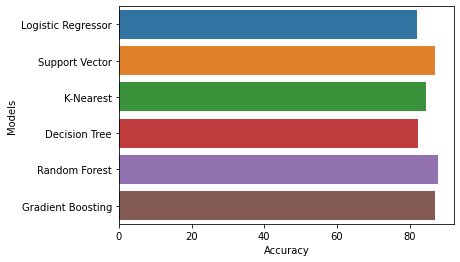

In [ ]:
sns.barplot(x='Accuracy',y='Models',data=results)

In [ ]:
import sklearn.metrics as metrics

In [ ]:
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_log1pred)
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_svc1pred)
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, y_knn1pred)
fpr4, tpr4, threshold4 = metrics.roc_curve(y_test, y_dtc1pred)
fpr5, tpr5, threshold5 = metrics.roc_curve(y_test, y_rfc1pred)

In [ ]:
roc_auc1 = metrics.auc(fpr1, tpr1)
roc_auc2 = metrics.auc(fpr2, tpr2)
roc_auc3 = metrics.auc(fpr3, tpr3)
roc_auc4 = metrics.auc(fpr4, tpr4)
roc_auc5 = metrics.auc(fpr5, tpr5)

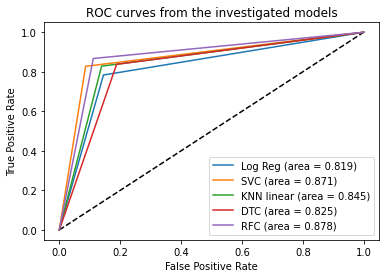

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label='Log Reg (area = %0.3f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='SVC (area = %0.3f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='KNN linear (area = %0.3f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='DTC (area = %0.3f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='RFC (area = %0.3f)' % roc_auc5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves from the investigated models')
plt.legend(loc='best')
plt.show()

## Fine Tuning

In [ ]:
#number of trees in RF
n_estimators=[20,60,100,120]

#number of features to consider at every split
max_features=[0.2,0.6,1.0]

#max number of levels in tree
max_depth=[2,8,None]

#number of samples
max_samples=[0.5,0.75,1.0]

#108 diff RF trains

In [ ]:
param_grid={'n_estimators': n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'max_samples':max_samples
           }

print(param_grid)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
rf= RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid =GridSearchCV(estimator= rf,
                     param_grid= param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 120}

In [ ]:
rf_grid.best_score_

0.8835164835164836

#Neural Network Model

In [ ]:
x_train_ann,x_test_ann,y_train_ann,y_test_ann=train_test_split(df1.drop('Exited',axis=1),df1['Exited'],test_size=0.2,random_state=35)


In [ ]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_ann[scale_var] = scaler.fit_transform(x_train_ann[scale_var])
x_test_ann[scale_var]=scaler.transform(x_test_ann[scale_var])

In [ ]:
x_train_ann

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
3738,0.296,0,0.351351,0.2,0.481082,0.333333,1,1,0.490921,1.229455,0.045455,0,1,0
1198,0.468,1,0.270270,0.9,0.416839,0.000000,1,0,0.883516,0.591945,0.236842,1,0,0
3744,0.594,1,0.256757,0.3,0.464372,0.000000,1,1,0.747683,0.779239,0.081081,0,1,0
7173,0.788,0,0.162162,0.1,0.494373,0.000000,1,1,0.711142,0.872206,0.033333,0,0,1
6434,0.556,0,0.364865,0.8,0.000000,0.333333,1,0,0.969655,0.000000,0.177778,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,0.504,1,0.202703,0.5,0.656459,0.000000,0,1,0.903707,0.911398,0.151515,1,0,0
7148,0.840,1,0.162162,0.8,0.000000,0.333333,0,1,0.254193,0.000000,0.266667,0,0,1
9143,0.652,0,0.216216,0.8,0.400001,0.000000,0,0,0.230181,2.179915,0.235294,1,0,0
1295,0.368,0,0.202703,0.3,0.602769,0.000000,0,0,0.996829,0.758685,0.090909,0,0,1


In [ ]:
x_test_ann

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
6656,0.666,0,0.229730,0.1,0.527590,0.333333,0,0,0.930750,0.711201,0.028571,0,1,0
1656,0.462,1,0.175676,0.6,0.465893,0.000000,1,0,0.535738,1.091046,0.193548,0,1,0
5172,0.406,1,0.256757,0.2,0.000000,0.333333,1,0,0.169363,0.000000,0.054054,1,0,0
5961,0.892,1,0.189189,0.5,0.409621,0.333333,0,1,0.589227,0.872194,0.156250,0,0,1
4138,0.850,1,0.189189,0.8,0.484935,0.000000,0,1,0.629563,0.966408,0.250000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,0.402,1,0.783784,0.2,0.511804,0.333333,1,1,0.908721,0.706645,0.026316,0,0,1
9495,0.660,1,0.202703,1.0,0.732443,0.000000,1,0,0.820706,1.119725,0.303030,1,0,0
779,0.658,0,0.229730,0.8,0.475024,0.000000,0,0,0.606116,0.983274,0.228571,0,0,1
7604,0.682,0,0.567568,0.6,0.402836,0.000000,1,0,0.886902,0.569875,0.100000,1,0,0


In [ ]:
!pip install tensorflow


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(None,32,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_ann,y_train_ann, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 873us/step - loss: 0.6635 - accuracy: 0.7916
Epoch 2/100
250/250 [==============================] - 0s 903us/step - loss: 0.5377 - accuracy: 0.7954
Epoch 3/100
250/250 [==============================] - 0s 797us/step - loss: 0.4668 - accuracy: 0.7959
Epoch 4/100
250/250 [==============================] - 0s 825us/step - loss: 0.4559 - accuracy: 0.7976
Epoch 5/100
250/250 [==============================] - 0s 884us/step - loss: 0.4628 - accuracy: 0.8009
Epoch 6/100
250/250 [==============================] - 0s 864us/step - loss: 0.4650 - accuracy: 0.7966
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4398 - accuracy: 0.8065
Epoch 8/100
250/250 [==============================] - 0s 827us/step - loss: 0.4365 - accuracy: 0.8081
Epoch 9/100
250/250 [==============================] - 0s 851us/step - loss: 0.4544 - accuracy: 0.8059
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss:

In [ ]:
model.evaluate(x_test_ann, y_test_ann)

63/63 [==============================] - 1s 752us/step - loss: 0.3555 - accuracy: 0.8575


[0.35551270842552185, 0.8575000166893005]

In [ ]:
yp = model.predict(x_test_ann)
yp

63/63 [==============================] - 0s 731us/step


array([[0.13285908],
       [0.22686145],
       [0.05117698],
       ...,
       [0.22055905],
       [0.90116   ],
       [0.09271529]], dtype=float32)

### Converting our predictions to 0,1 to check accuracy

In [ ]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Checking the accuracy

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test_ann,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1600
           1       0.76      0.42      0.54       400

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Text(69.0, 0.5, 'Truth')

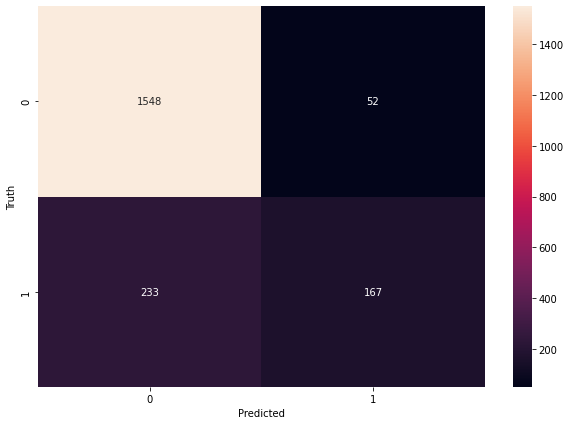

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test_ann,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy score is: ", accuracy_score(y_test_ann,y_pred)*100,"%")

Accuracy score is:  85.75 %


#Saving The model

In [ ]:
import joblib

In [ ]:
joblib.dump(rfc1,'Bank_Attrition_Predictor')

['Bank_Attrition_Predictor']

In [ ]:
Churn_Model=joblib.load('Bank_Attrition_Predictor')

In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'BalanceSalaryRatio', 'TenureByAge'],
      dtype='object')

In [ ]:
model.predict([[672,0,0,0,0,0,0,0,0,0,0,0,0,0]])

1/1 [==============================] - 0s 110ms/step


array([[0.]], dtype=float32)

#GUI

In [ ]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

In [ ]:
def gui():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=str(e9.get())
    if p9 == 'Germany' or p9=='germany':
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 'Spain' or p9=='spain':
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 'France' or p9=='france':
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    else:
      print('Incorrect Input')
    p10=int(e10.get())
    model = joblib.load('Churn_Model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))

    if result == 0:
        Label(master, text="Retain").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)


master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Bank Customers Attrition Prediction "
                          , bg = "blue", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=gui).grid()

mainloop()